In [ ]:
#load data
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x=layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x=layers.Flatten()(x)
outputs=layers.Dense(10, activation="softmax")(x)
model=keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Preprocesser
train_images=train_images.reshape((60000,28,28,1))
train_images=train_images.astype("float32")/255
test_images=test_images.reshape((10000,28,28,1))
test_images=test_images.astype("float32")/255
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
model.fit(train_images,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 74ms/step - accuracy: 0.8805 - loss: 0.3777
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 67ms/step - accuracy: 0.9835 - loss: 0.0505
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 101s 87ms/step - accuracy: 0.9908 - loss: 0.0309
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 64ms/step - accuracy: 0.9927 - loss: 0.0232
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.9952 - loss: 0.0156


In [ ]:
#Evaluation
test_loss, test_acc=model.evaluate(test_images,test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9888 - loss: 0.0347
Test accuracy: 0.992


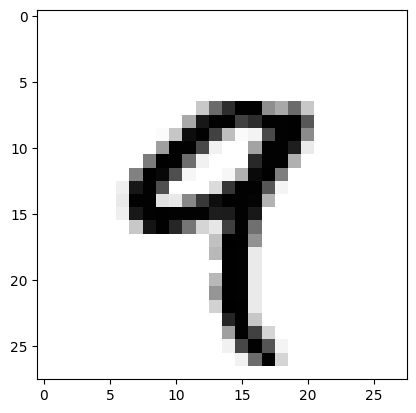

In [ ]:
import matplotlib.pyplot as plt
digit=train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()